NY AirBnbs 

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [3]:
df = pd.read_csv('AB_NYC_2019.csv')

In [ ]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         48895 non-null  int64  
 1   neighbourhood_group             48895 non-null  object 
 2   neighbourhood                   48895 non-null  object 
 3   latitude                        48895 non-null  float64
 4   longitude                       48895 non-null  float64
 5   room_type                       48895 non-null  object 
 6   price                           48895 non-null  int64  
 7   minimum_nights                  48895 non-null  int64  
 8   number_of_reviews               48895 non-null  int64  
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  int64  
 11  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(6), object(

In [7]:
df = df.drop(['id', 'name', 'host_name', 'last_review'], axis=1) #unnecessary columns
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)


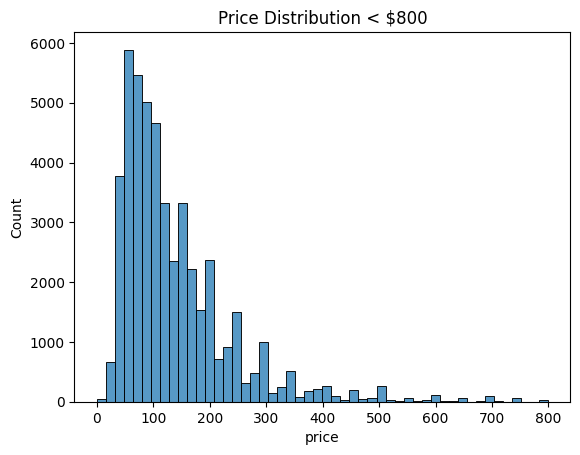

In [21]:
sns.histplot(df[df['price'] < 800]['price'],bins=50)
plt.title('Price Distribution < $800')
plt.show()

The distribution is heavily right-skewed.Most airbnbs are relatively affordable, while a smaller number are significantly more expensive.

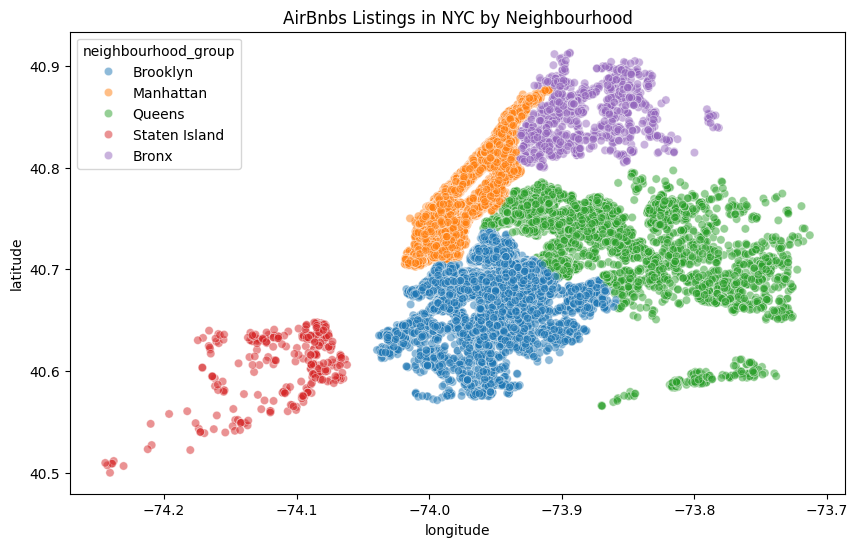

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df['price'] < 500], x='longitude', y='latitude', hue='neighbourhood_group', alpha=0.5)
plt.title('AirBnbs Listings in NYC by Neighbourhood')
plt.show()

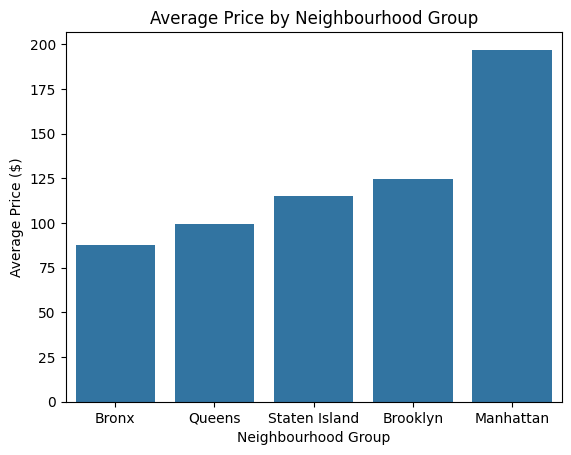

In [23]:
group_price = df.groupby('neighbourhood_group')['price'].mean().sort_values()
sns.barplot(x=group_price.index, y=group_price.values)
plt.title("Average Price by Neighbourhood Group")
plt.ylabel("Average Price ($)")
plt.xlabel("Neighbourhood Group")
plt.show()


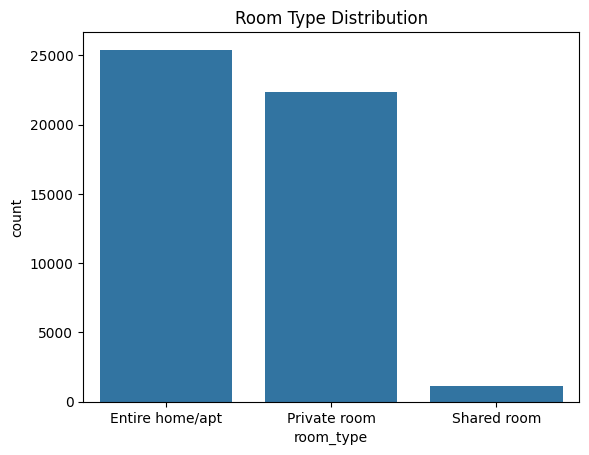

In [24]:
sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index)
plt.title("Room Type Distribution")
plt.show()


For training, I decided to make 800 to just 500 since it's enough to remove outliers.

In [43]:
f = df[df['price'] < 500]

df_encoded = pd.get_dummies(f, columns=['neighbourhood_group', 'room_type', 'neighbourhood'], drop_first=True)

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"Mean Absolute error: ${mae:.2f}")
print(f"Mean Squared Error: ${rmse:.2f}")

Mean Absolute error: $38.52
Mean Squared Error: $57.94


On average, the current model's predictions are off by $38.52 from the actual Airbnb price. Typical prediction error is about $57.94 which means the model (RandomForestRegressor) occasionally maskes bigger mistakes, even if average performance is okay.